# LightGBM
XGBoost보다 학습에 걸리는 시간이 훨씬 적음
리프 중심 트리 분할 방식을 사용함 (기존의 대부분의 트리의 깊이를 효과적으로 줄기이 위해 균형 트리 분할 방식을 사용함)

XGBoost 대비 장점
- 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할

In [1]:
!pip install lightgbm

## LightGBM 하이퍼 파라미터, 튜닝 방안 정리하기

## LightGBM 실습 - 위스콘신 유방암 예측

In [2]:
import lightgbm

print(lightgbm.__version__)

3.2.1


In [13]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습, 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.600521
Training until validation scores don't improve for 50 rounds
[2]	valid_0's binary_logloss: 0.566786
[3]	valid_0's binary_logloss: 0.537032
[4]	valid_0's binary_logloss: 0.510051
[5]	valid_0's binary_logloss: 0.484612
[6]	valid_0's binary_logloss: 0.462044
[7]	valid_0's binary_logloss: 0.441736
[8]	valid_0's binary_logloss: 0.423503
[9]	valid_0's binary_logloss: 0.404695
[10]	valid_0's binary_logloss: 0.389195
[11]	valid_0's binary_logloss: 0.373406
[12]	valid_0's binary_logloss: 0.35902
[13]	valid_0's binary_logloss: 0.347118
[14]	valid_0's binary_logloss: 0.334367
[15]	valid_0's binary_logloss: 0.32073
[16]	valid_0's binary_logloss: 0.309168
[17]	valid_0's binary_logloss: 0.298417
[18]	valid_0's binary_logloss: 0.289111
[19]	valid_0's binary_logloss: 0.278582
[20]	valid_0's binary_logloss: 0.269638
[21]	valid_0's binary_logloss: 0.26153
[22]	valid_0's binary_logloss: 0.253245
[23]	valid_0's binary_logloss: 0.244743
[24]	valid_0's binary_logloss: 

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9395


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

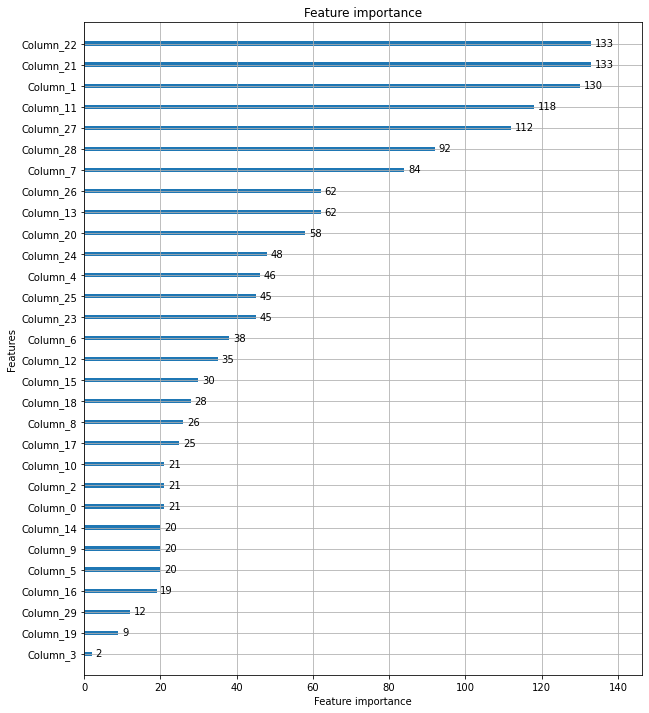

In [21]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)